In [8]:
# Sinan Yumurtaci
# Psychology Research with Professor Derek Huffman

# PythonLogProcessing.ipynb
# processes a log file into a format more suitable for further analysis
# demonstrates some simple plots of that data.

In [24]:
# imports

import csv
import numpy as np 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook


In [10]:
# constants

LOGFILE_NAME = "default_default_pto1_default.log"

In [11]:
timestamps = np.empty((0,1))
positions = np.empty((0,3))
rotations = np.empty((0,3))
tasks = np.empty((0,1))
task_ids = np.empty((0,1))

In [41]:
# read through the file and populate the relevant arrays

with open(LOGFILE_NAME) as logfile:
    logreader = csv.reader(logfile, delimiter='\t')
    current_task = "UNDEFINED TASK"
    current_task_id = 0
    for row in logreader:
        if len(row) > 2:
            if row[1] == "Avatar: ": # tracking position, rotation

                # KNOWN BUG: if the log-file is cut in the middle of a row, this section might error out
                time = int(row[0])
                pos = [float(x) for x in row[4:7]]
                rot = [float(x) for x in row[12:15]]

                timestamps = np.append(timestamps,  np.array(time))
                positions = np.append(positions, np.array([pos]), axis = 0)
                rotations = np.append(rotations, np.array([rot]), axis = 0)
                tasks = np.append(tasks, np.array([current_task]))
                task_ids = np.append(task_ids, np.array([current_task_id]))

            if row[1] == "TASK_START":
                current_task = row[2]
                current_task_id += 1

<IPython.core.display.Javascript object>


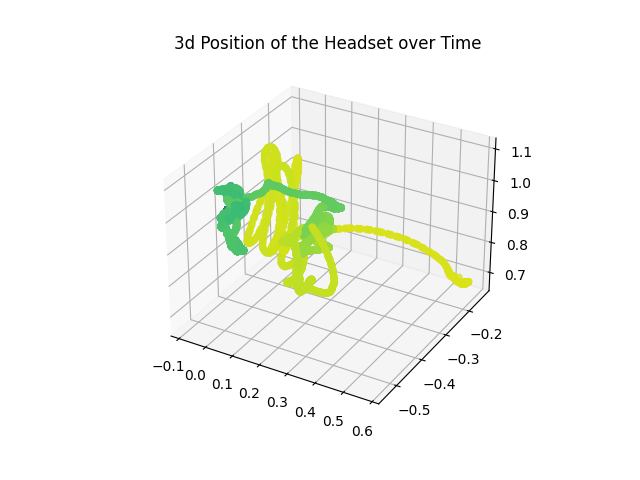

In [42]:
# simple plot of position over time.
# color gradient describes movement over time

# syntax for 3-D projection 
fig = plt.figure() 
ax = plt.axes(projection ='3d') 

# defining axes
x = positions[:,0]
y = positions[:,2]
z = positions[:,1]

c = timestamps

ax.scatter(x, y, z, c = c)
ax.set_title('3d Position of the Headset over Time')

plt.show() 

<IPython.core.display.Javascript object>


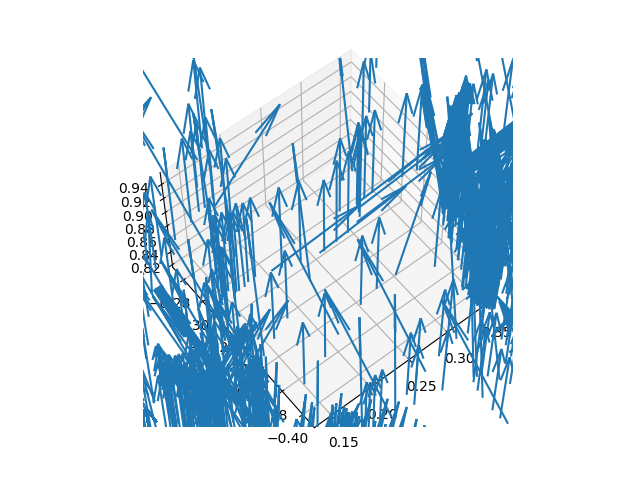

[11518 22607  7952  4211 21129  9211 11766 22970  9191 17203 21217  5364
 16805 10902 17380   294 12342 18457 16978  4008  7194  7786  1339 19044
  1812 16364  6742 14282  5039 12360  7157 20426  6209 17429  9573  1427
  9637  7838 21582 21444  6690 21083 18877  2292  9756 18582 13487 16097
  3554 20426  4168  4396  3382  1484 18918 22585 11077 13903  7567 20681
  8282  8435  3714 13619   833  6835  4609 13229 16098 20016 16763  4774
 12497  3187 19466  4244  1408 18112 14141 13779 20236  3288 15090 19244
  8845  6445  8845  9807 14204 13981  5449 21076 22245 21138  4436 14073
 14804  6846  9858 11994  7193  3028 12212  8703 15310 10167  6630 20238
 21776  5704  9628 10278  9627 19805 21072   306 10715 19057 22495   370
 10843 15127 13592  5840  9823   403 14304 12578 19950  9257 15307 20915
 16198 12173 13426 14283  5267 16814 12979  1726 20592 19877 22803 14610
  8236 13948 21610  4409 13098 10104]


In [45]:
# quiver plot showing position & rotation over time
# there is no coloring available with this plot

# work in progress

# syntax for 3-D projection
mask = np.random.choice(len(timestamps), 150)
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
u = rotations[:,0]
v = rotations[:,2]
w = rotations[:,1]
ax.quiver(x[1500::10], y[1500::10], z[1500::10],
          u[1500::10], v[1500::10], w[1500::10], length = 0.1, normalize = True)
plt.show()
print(mask)